# 10. Read in Data from Online Sources + CSV to Geodataframe

In this optional notebook we'll be going over how to read data into a notebook from online sources.

- [10.1 Introduction ](#section1)
- [10.2 Read File from a URL](#section2)
- [10.3 Read File from an API](#section3)
- [10.4 Read in Data from a Python Library](#section4)
- [10.5 Exercise](#section5)
- [10.6 Read and Convert a CSV File to a GeoDataFrame](#section6)



<br>
<font color='grey'>
    
**Instructor Notes**
- Datasets used
    - California census tract cartographic [boundaries](https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_06_place_500k.zip) for 2019 from the United States Census Bureau
    - United States county cartographic [boundaries](https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip) for 2019 from the United States Census Bureau
    - San Francisco [bikeway routes](https://data.sfgov.org/api/geospatial/ygmz-vaxd?method=export&format=GeoJSON)
    - Berkeley [bikeway routes](https://data.cityofberkeley.info/api/geospatial/fgw9-98ic?method=export&format=GeoJSON)
    - Open Street Map San Francisco and Berkeley street networks obtained with the Python OSMNX package

<a id="section1"></a>
## 10.1 Introduction

In the past examples, the data we have imported into our notebooks has come either from previously downloaded and saved files or from the census API. The goal of this notebook is to present other ways of accessing data, either from **urls**, other **APIs** or from predetermined **Python libraries**.

### Setup
Let's import the packages we need before we get started.

In [2]:
import pandas as pd
import collections
import requests 
from urllib.request import urlopen, Request

import json # for working with JSON data
import geojson # ditto for GeoJSON data - an extension of JSON with support for geographic data
import geopandas as gpd

import matplotlib # base python plotting library
%matplotlib inline  
import matplotlib.pyplot as plt # more plotting stuff

<a id="section2"></a>
## 10.2 Read File from a URL

The following link shows the different shapefile data available through the Census Bureau [website](https://www2.census.gov/geo/tiger/GENZ2019/shp/). Clicking on any of the files will dowload the .zip file unto your computer.

This notebook will show a workaround to access the file directly from the notebook, without having to go through the process of previously downloading the shapefile.

For this example, we will download the cities for the state of California ([cb_2019_06_place_500k.zip](https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_06_place_500k.zip)). Remember that California's State FIPS code is 06, which is how we recognize that this dataset is associated with the state of California.

### Read the data from the url, read it using geopandas and create a subset of only Berkeley places

First, we'll save the data from the url into a variable called *ca_places*.

In [4]:
ca_places = "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_06_place_500k.zip"

Now, we'll use geopandas to read the file and then we'll visualize it to make sure we read it properly

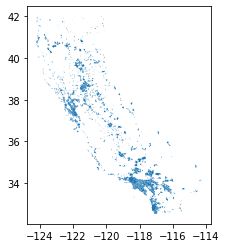

In [5]:
places = gpd.read_file(ca_places)
places.plot(); ### This takes a little bit, because the file is fairly large

#### CONFIRM THAT THIS IS TRUE
Notice that there are some spaces inside the boundaries of the state of California that are empty. These are unincorporated areas.

However, say we are only interested in the City of Berkeley. Let's examine the file to see how we could select the polygon fob Berkeley. We'll take a look at which columns are included in the dataset.

In [ ]:
places.head()

Let's try filtering by Name

In [ ]:
berkeley = places[places['NAME']=='Berkeley']
berkeley.plot();

Awesome! This worked! Now we have a polygon with the boundaries of the City of Berkeley.

<a id="section3"></a>
## 10.3 Read in file from a API

In this section, we will be reading a file using an API, or Application Programming Interface. APIs are very useful, because they allow two different portals to talk to each other. For more information on APIs, take a look [here](https://en.wikipedia.org/wiki/Application_programming_interface).

In this case, we will be using the City of Berkeley Open Data Portal's API to read in information on the bike network to out notebook.

Below you can find more information both on the City of Berkeley's Open Data portal and on the bike network data.

### Berkeley Open Data portal
https://data.cityofberkeley.info/

### Berkeley Bike Network data
https://data.cityofberkeley.info/Transportation/Bicycle-Boulevards/fgw9-98ic


We will be reading the geospatial data for the bike network of the City of Berkeley.

As before, first we'll save the data from the url into a variable called *berkeley_bike_ways* and then we'll read it using geopandas.

In [ ]:
berkeley_bike_ways = "https://data.cityofberkeley.info/api/geospatial/fgw9-98ic?method=export&format=GeoJSON"
bikes = gpd.read_file(berkeley_bike_ways)

Now, we'll plot the bikeways on top of the City of Berkeley polygon that we imported from the Census Bureau url

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
berkeley.plot(ax=ax)
bikes.plot(ax=ax)
plt.show()

Oops! Where did the bike lanes go? Well, python uses a default color for all plots, so the bike paths were plotted on top of the polygon in the exact same color. Let's try to plot the bike lanes yellow.

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
berkeley.plot(ax=ax)
bikes.plot(ax=ax, color="yellow")
plt.show()

Now we have a map that shows where the bike network of the City of Berkeley is located.

<a id="section4"></a>
## 10.4 Read in data via a Python library (OSMnx)

OSMnx is a Python library that lets you access Open Street Map's street networks through an API.

You can explore more of Open Street Maps [here](https://www.openstreetmap.org/)

You can access the full documentation of OSMnx [here](https://osmnx.readthedocs.io/en/stable/index.html)

In [ ]:
# Uncomment to install library
# !pip install osmnx

If the below cell does not run, you need to install the library first, by uncommmenting and running the cell above

> **Note**
>
> If you get a `numpy` associated error you may need to uninstall and reinstall `numpy` as well as set up tools. Run the following lines of code in your terminal:
><code>
    pip uninstall -y numpy
    pip uninstall -y setuptools
    pip install setuptools
    pip install numpy</code>

In [ ]:
import osmnx as ox

Now we can use the osmnx library to access data from Open Street Maps. Let's try to load the Berkeley street map. 
We are using the graph_from_place function, with full documentation [here](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_place).


We need to define two arguments for the function: the **query** and the **network type**

- **Query**: For cities in the US, the query should follow the following format: "City Name, State Abbreviation, USA"
    
    
- **Network Type**: This is where we define which network we are interested in. Some of the available options are:
    - all
    - drive
    - walk
    - bike


Let's try to read the data for the vehicular network for Berkeley.

In [ ]:
place = "Berkeley, CA,  USA"
graph = ox.graph_from_place(place, network_type='drive')

This took a while to read. Let's take a look at how many elements were loaded from OSM for Berkeley

In [ ]:
len(graph)

Let's check the data type

In [ ]:
type(graph)

This is a new format. To get this into something that is familiar to us, we are going to extract the nodes and links by using the *graph_to_gdfs* function, which converts our data from a graph to two geodataframes. Because a street network is made up from nodes and links, and our geodatraframes can only have one geography type, the *graph_to_gdfs* returns 2 geodataframes: a node (point) and a street (line) geodataframe.

In [ ]:
nodes, streets = ox.graph_to_gdfs(graph)
streets.plot();

Now, let's try to put everything together in the same map (the limits of the city, the bike lanes and the streets)

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
berkeley.plot(ax=ax)
streets.plot(ax=ax, color="grey")
bikes.plot(ax=ax, color="yellow")
plt.show()

Another feature that we can extract form OSMnx is the bus stops. To do this, we use the pois_from_place function (see full documentation [here](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.pois.pois_from_place))

This function requires two arguments: the **query** (same as above) and the **tag**:

- **Query**: For cities in the US, the query should follow the following format: "City Name, State Abbreviation, USA"
    
    
- **Tag**: This is where we define which tags we are interested in. There are many options available. You can find a list of tag features [here](https://wiki.openstreetmap.org/wiki/Map_Features#Highway). These tags are coded as dictionaries. Bus stops are a value defined under the key highway, therefore, the format to call for bus stops looks like this: {'highway':'bus_stop'}

Let's access the bus stops using the same query defined for Berkeley

> **Note**
>
>If you are using an older version of `osmnx` you would be able to use the function `pois_from_place`. This and other functions such as `footprints_from_place` are deprecated as of July 2020. `geometries_from_place` is meant to replace these functions.

In [ ]:
### fetch and map POIs from osmnx
busstops = ox.geometries_from_place(place, tags = {'highway':'bus_stop'})

Now, let's check the data type busstops was read as

In [ ]:
type(busstops)

As we can see, busstops is already a geodataframe. Therefore, we can plot it as it is unto out map.

In [ ]:
fig, ax = plt.subplots(figsize = (10,8)) 
berkeley.plot(ax=ax)
streets.plot(ax=ax, color="grey")
bikes.plot(ax=ax, color="yellow")
busstops.plot(ax=ax, color="white")
plt.show()

<a id="section5"></a>
## 10.5 Exercise

Repeat above for SF. The link for accessing the bikeways for SF is already given to you below.

### SF Open Data portal

https://datasf.org/opendata/

#### SF Bike Network data
https://data.sfgov.org/Transportation/SFMTA-Bikeway-Network/ygmz-vaxd

In [ ]:
sf_bike_ways = "https://data.sfgov.org/api/geospatial/ygmz-vaxd?method=export&format=GeoJSON"

In [ ]:
# Your code here

## Double-click here to see solution!

<!--

# SOLUTION:

sf_bikes = gpd.read_file(sf_bike_ways)

# Limit places data to San Francisco
sf = places[places['NAME']=='San Francisco']

# Set place to be for SF
place = "San Francisco, CA,  USA"
# Pull in networtk from OSM
graph = ox.graph_from_place(place, network_type='bike')
# Extract nodes and streets as geodataframes
nodes, streets = ox.graph_to_gdfs(graph)

# Plot results
fig, ax = plt.subplots(figsize = (10,8)) 
sf.plot(ax=ax)
streets.plot(ax=ax, color="grey")
sf_bikes.plot(ax=ax, color="yellow")
plt.show()


-->

<a id="section6"></a>
## 10.6 Read in Data from a CSV and convert to geodataframe

In this example, we'll learn how to read a csv file with latitude and longitude coordinates and convert it to a geodataframe for plotting.

In [ ]:
# Read in CSV file
stations = pd.read_csv("notebook_data/transportation/bart.csv")
stations.head()

We now want to convert the csv file into a Point geodataframe, so we can produce maps and access the geospatial analysis tools.

We do this below with the geopandas `GeoDataFrame` function which takes as input

1. a pandas dataframe here `stations`, and
2. `geometry` for each row in the dataframe.

We create the geometry using the geopandas `points_from_xy` function, using the data in the `lon` and `lat` columns of the pandas dataframe.

In [ ]:
#Convert the DataFrame to a GeoDataFrame. 
bart_gdf = gpd.GeoDataFrame(stations, geometry=gpd.points_from_xy(stations.lon, stations.lat)) 

# and take a look
bart_gdf.plot();

Now we have a map of BART stations!  You can use this approach with any CSV file that has columns of x,y coordinates.

### 10.7 Exercises



Set the CRS for `bart_gdf` to WGS84

Below is the url for the 2019 census county geographic boundary file.

* Read in the county file
* Subset on Marin County
* Plot Marin County with the Bart stations you transformed
* Question: what should do if the county name is not unique?

In [ ]:
# Census Counties file for the USA
county_file = "https://www2.census.gov/geo/tiger/GENZ2019/shp/cb_2019_us_county_500k.zip"

In [ ]:
# Your code here

## Double-click here to see solution!

<!--

# SOLUTION:

# Set CRS of Bart since it's missing
bart_gdf.crs ='epsg:4326'

# Bring in counties
counties = gpd.read_file(county_file)
counties.head()

# Subset to marin
marin = counties[counties['NAME']=='Marin']
marin.crs

# Figure
fig,ax = plt.subplots(figsize=(8,8))
marin.plot(ax=ax,color='tan')
bart_gdf.plot(ax=ax,color='k')

-->

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        
